In [1]:
#R Exercise BA
#Notwendige Pakete laden
require("RPostgreSQL")
require("ggplot2") 

#Datenbankverbindung einrichten
drv <- dbDriver("PostgreSQL")
con <- dbConnect(drv, dbname = "postgres",
                 host = "localhost", port = 5432,
                 user = "postgres"
				 )
				 
#Abfragen ob alle Tabellen existieren
				 
if (dbExistsTable(con, "Student") && dbExistsTable(con, "Klausur") && dbExistsTable(con, "Notenliste") == FALSE)
{print("Necessary tables are missing please check the database ")}else {print("All tables exist")}



#1. Alle Noten eines bestimmten Studierenden:

marks_of <- function(student) {
data <- dbGetQuery(con, paste("SELECT \"Note\", \"pNr\" FROM \"Notenliste\" WHERE \"matNr\" =", student)) #SQL-Statement mit übergebenem Parameter erzeugen und ausführen
if (dim(data)[1] == 0){return( paste("No result for Student:",student))} #Prüfen ob Daten vorhanden sind, falls nicht Warnung ausgeben 
else {return(data)} #Noten des Studierenden zurrück geben 
}


#2. Notenschnitt eines Studierenden

avg_marks_of <- function(student) {
data <- dbGetQuery(con, paste("SELECT \"Note\" FROM \"Notenliste\" WHERE \"matNr\" =", student)) #SQL-Statement mit übergebenem Parameter erzeugen und ausführen
if (dim(data)[1] == 0){return( paste("No result for Student:",student))} #Prüfen ob Daten vorhanden sind, falls nicht Warnung ausgeben
else {return(mean(data$Note))} #Durchschnittsnote berechnen und zurrück geben 
}


#3. Alle Noten einer Prüfung

result_of <- function(exam) {
data <- dbGetQuery(con, paste("SELECT \"Note\", \"matNr\" FROM \"Notenliste\" WHERE \"pNr\" =", exam)) #SQL-Statement mit übergebenem Parameter erzeugen und ausführen
if (dim(data)[1] == 0){return( paste("No result for Exam:",exam))} #Prüfen ob Daten vorhanden sind, falls nicht Warnung ausgeben
else {return(data)} #Noten der  Prüfung zurrück geben 
}


#4. Notenschnitt einer Prüfung

avg_result_of <- function(exam) {
data <- dbGetQuery(con, paste("SELECT \"Note\" FROM \"Notenliste\" WHERE \"pNr\" =", exam)) #SQL-Statement mit übergebenem Parameter erzeugen und ausführen
if (dim(data)[1] == 0){return( paste("No result for Exam:",exam))} #Prüfen ob Daten vorhanden sind, falls nicht Warnung ausgeben
else {return(mean(data$Note))} #Notenschnitt der Prpfung berechnen und zurrück geben 
}


#5. Notenschnitte aller Studierenden

avg_marks_all <- function() {
data <- dbGetQuery(con, paste("SELECT AVG(\"Note\"), \"matNr\" FROM \"Notenliste\" GROUP BY \"matNr\"")) #SQL-Statement erzeugen und ausführen
if (dim(data)[1] == 0){return( paste("There are no students in the database"))} #Prüfen ob Daten vorhanden sind, falls nicht Warnung ausgeben
else {return(data)} # Durchschnittsnoten der Studierenden zurrück geben 
}

#6. Meadian der Notenschnitte

med_marks_all <- function() {
data <- dbGetQuery(con, paste("SELECT AVG(\"Note\"), \"matNr\" FROM \"Notenliste\" GROUP BY \"matNr\"")) #SQL-Statement erzeugen und ausführen
if (dim(data)[1] == 0){return( paste("There are no students in the database"))} #Prüfen ob Daten vorhanden sind, falls nicht Warnung ausgeben
else {return(median(data$avg))} #Median der Noten berechnen und zurrück geben 
}

#7. Standartabweichung der Notenschnitte

stdev_marks_all  <- function() {
data <- dbGetQuery(con, paste("SELECT AVG(\"Note\"), \"matNr\" FROM \"Notenliste\" GROUP BY \"matNr\"")) #SQL-Statement erzeugen und ausführen
if (dim(data)[1] == 0){return( paste("There are no students in the database"))} #Prüfen ob Daten vorhanden sind, falls nicht Warnung ausgeben
else {return(sd(data$avg))} # Standartabweichung der Noten berechnen und zurrück geben
}

#8. Diagrammme :

#8.1 Noten einer Prüfung
result_of_graph <- function(exam) {
data <- dbGetQuery(con, paste("SELECT \"Note\", \"matNr\" FROM \"Notenliste\" WHERE \"pNr\" =", exam))  #SQL-Statement mit übergebenem Parameter erzeugen und ausführen
if (dim(data)[1] == 0){return( paste("There are no results for exam ",exam,". No visualization possible"))} #Prüfen ob Daten vorhanden sind, falls nicht Warnung ausgeben
else {ggplot(data, aes(x=Note)) + geom_histogram(color = "black", fill = "blue", bins = 13)  + labs(title=paste("Noten der Prüfung ", + exam)) +
  labs(x="Note", y="Anzahl")}  # Histogramm zeichnen
}
#8.2 Notenschnitte aller Studierenden

avg_marks_all_graph <- function() {
data <- dbGetQuery(con, paste("SELECT AVG(\"Note\"), \"matNr\" FROM \"Notenliste\" GROUP BY \"matNr\""))  #SQL-Statement mit übergebenem Parameter erzeugen und ausführen
if (dim(data)[1] == 0){return( paste("There are no students in the database. No visualization possible"))} #Prüfen ob Daten vorhanden sind, falls nicht Warnung ausgeben
else {ggplot(data, aes(x=avg)) + geom_histogram(color = "black", fill = "blue", bins = 13)  + labs(title="Durchschnittsnoten aller Studierender") +
  labs(x="Note", y="Anzahl")}  # Histogramm zeichnen
}


Loading required package: RPostgreSQL
Loading required package: DBI
Loading required package: ggplot2


[1] "All tables exist"


#### Funktion 1: Noten eines Studierenden

In [3]:
marks_of(5094)

Note,pNr
2.3,2
1.7,10
2.0,7
5.0,3
1.3,4
1.7,12
3.3,1


#### Funktion 2: Durchschnittsnote eines Studierenden

In [4]:
avg_marks_of(5094)

[1] 2.471429

#### Funktion 3: Noten einer Prüfung

In [5]:
result_of(7)

Note,matNr
2.3,5047
5.0,5397
5.0,5961
2.0,5404
1.0,5266
4.0,5174
2.7,5481
2.7,5145
2.3,5302
2.0,5112


#### Funktion 4: Durchschnittsnote einer Prüfung

In [6]:
avg_result_of(7)

[1] 2.757513

#### Funktion 5: Durschnittsnote aller Studierenden

In [7]:
avg_marks_all()

avg,matNr
2.825000,5955
1.850000,5629
4.150000,5817
2.500000,5721
2.700000,5264
3.650000,5594
3.080000,5706
3.300000,5830
1.650000,5831
3.300000,5944


#### Funktion 6: Median der Notenschnitte

In [8]:
med_marks_all()

[1] 2.666667

#### Funktion 7: Standartabweichung der Notenschnitte

In [9]:
stdev_marks_all()

[1] 0.8715574

#### Funktion 8: Visualisierung der Noten erner Prüfung

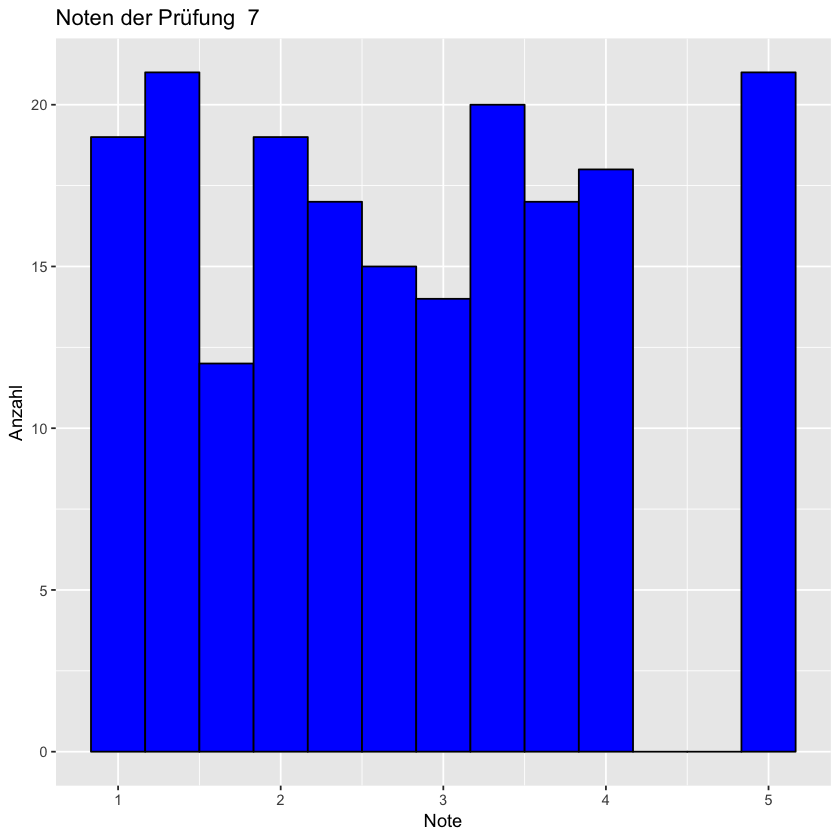

In [10]:
result_of_graph(7)

#### 8.2 Visuslisierung der Notenschnitte aller Studierenden

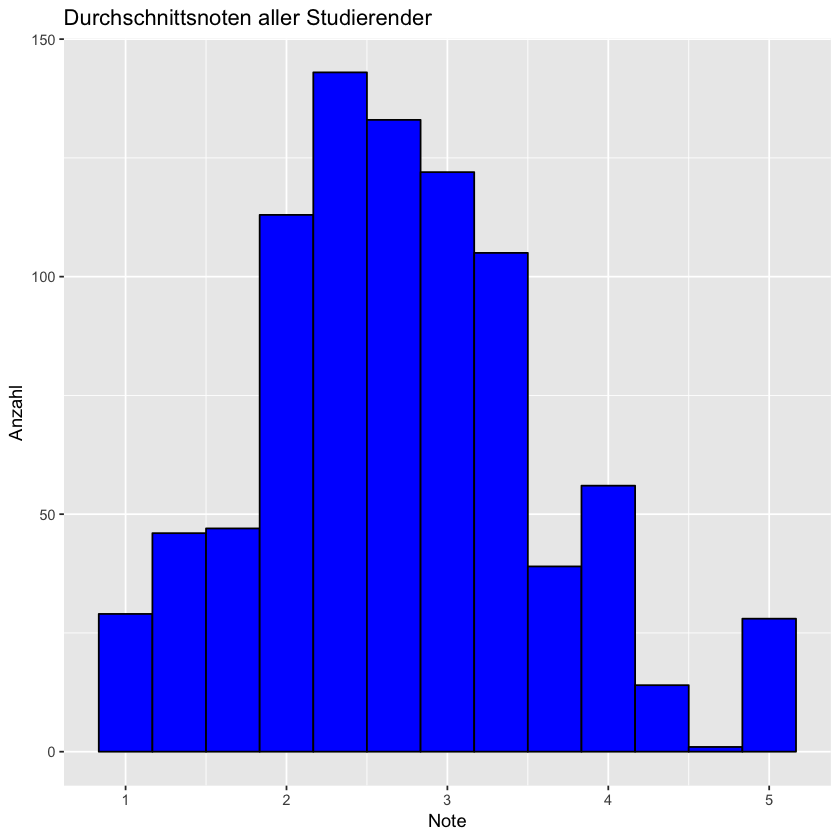

In [11]:
avg_marks_all_graph()